# Visualização dos Dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_bank = pd.read_csv('/content/bank.csv', sep=';')

df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


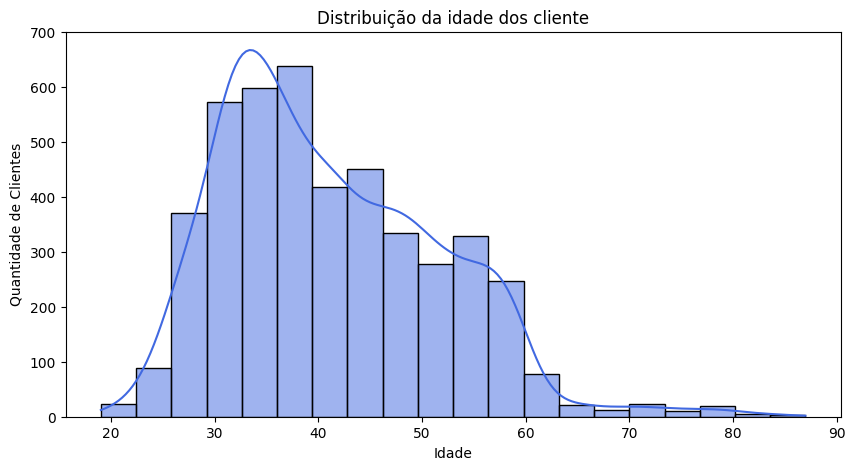

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_bank['age'], bins=20, kde=True, color='royalblue')
plt.title('Distribuição da idade dos cliente')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Clientes')
plt.show()

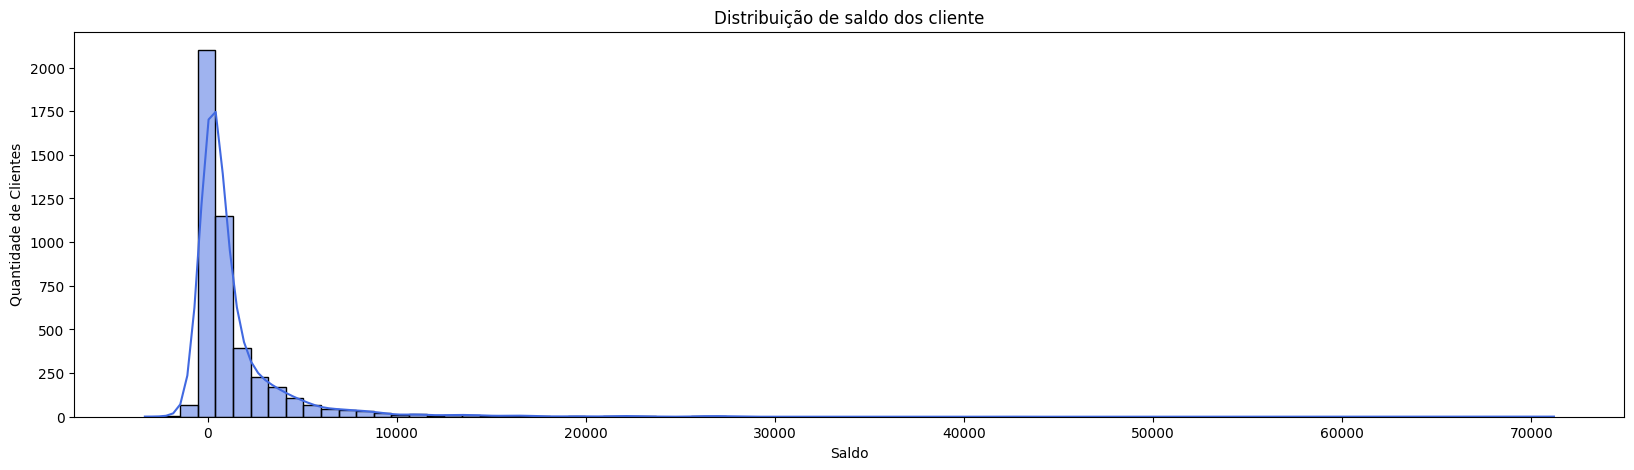

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df_bank['balance'], bins=80, kde=True, color='royalblue')
plt.title('Distribuição de saldo dos cliente')
plt.xlabel('Saldo')
plt.ylabel('Quantidade de Clientes')
plt.show()

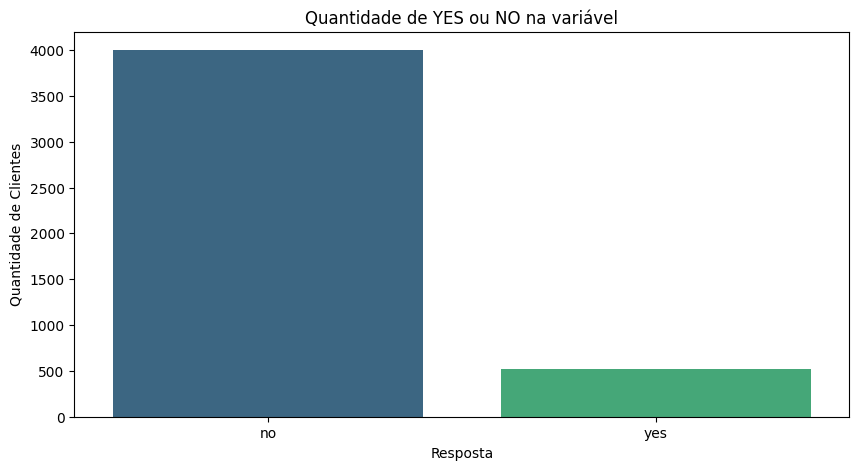

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='y', hue='y', data=df_bank, palette='viridis')
plt.title('Quantidade de YES ou NO na variável')
plt.xlabel('Resposta')
plt.ylabel('Quantidade de Clientes')
plt.show()

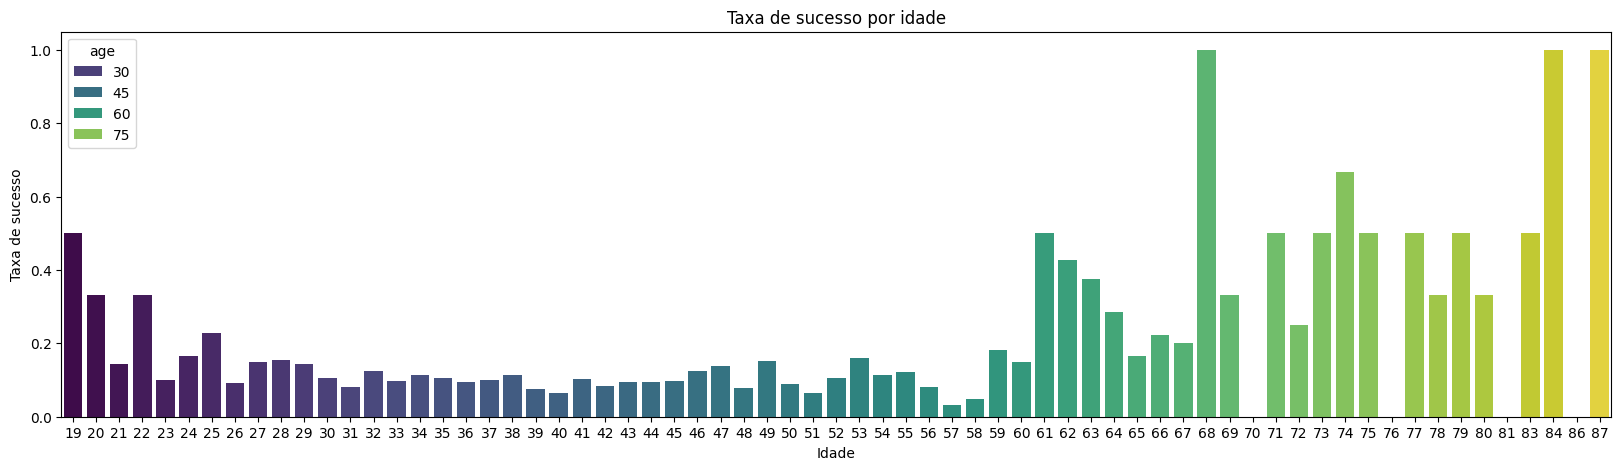

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='age', y=df_bank['y'].eq('yes').astype(int), hue='age', data=df_bank,palette='viridis', errorbar=None)
plt.title('Taxa de sucesso por idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de sucesso')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)

tabela_agrupada = df_bank.groupby('age')['y'].value_counts().unstack().fillna(0)

print(tabela_agrupada)

y       no   yes
age             
19     2.0   2.0
20     2.0   1.0
21     6.0   1.0
22     6.0   3.0
23    18.0   2.0
24    20.0   4.0
25    34.0  10.0
26    70.0   7.0
27    80.0  14.0
28    87.0  16.0
29    83.0  14.0
30   134.0  16.0
31   183.0  16.0
32   196.0  28.0
33   168.0  18.0
34   205.0  26.0
35   161.0  19.0
36   170.0  18.0
37   145.0  16.0
38   141.0  18.0
39   120.0  10.0
40   133.0   9.0
41   121.0  14.0
42   129.0  12.0
43   104.0  11.0
44    95.0  10.0
45   101.0  11.0
46   104.0  15.0
47    93.0  15.0
48   105.0   9.0
49    95.0  17.0
50    92.0   9.0
51    85.0   6.0
52    77.0   9.0
53    79.0  15.0
54    63.0   8.0
55    79.0  11.0
56    68.0   6.0
57    88.0   3.0
58    81.0   4.0
59    58.0  13.0
60    40.0   7.0
61     8.0   8.0
62     4.0   3.0
63     5.0   3.0
64     5.0   2.0
65     5.0   1.0
66     7.0   2.0
67     4.0   1.0
68     0.0   2.0
69     4.0   2.0
70     7.0   0.0
71     3.0   3.0
72     3.0   1.0
73     3.0   3.0
74     1.0   2.0
75     3.0   3

In [ ]:
# Muito interessante para analises por parte do analista, mas é meio feio e complexo para exibição
fig = px.parallel_categories(df_bank, dimensions=['loan', 'job'], color_continuous_scale=px.colors.sequential.Inferno)
fig.update_layout(title='Relação entre Loan e Job')
fig.show()

In [ ]:
grafico = px.treemap(df_bank, path=['job', 'education'])
grafico.show()

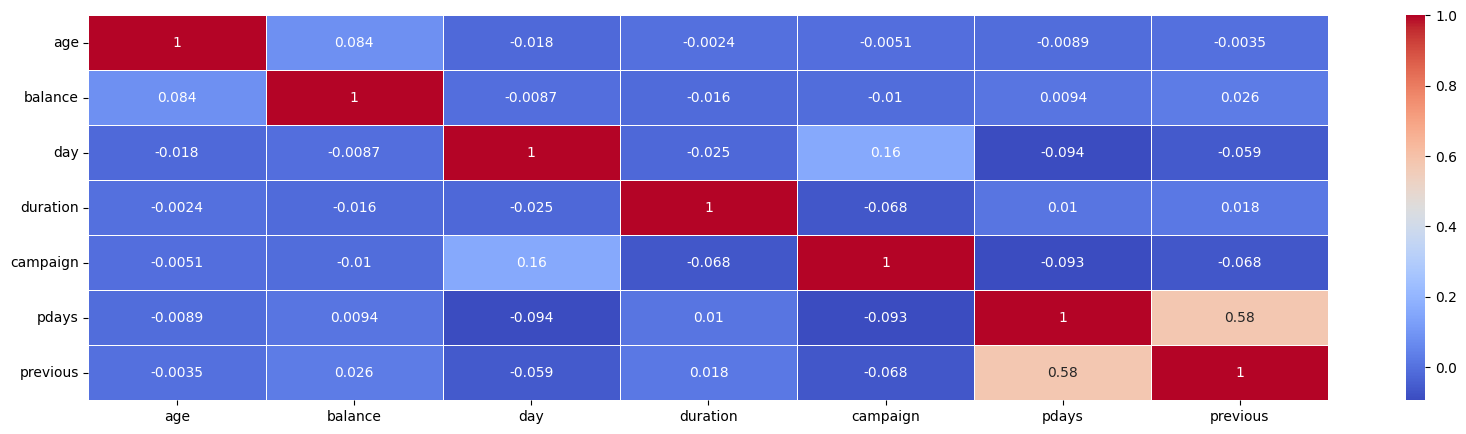

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Tratando as bases de dados do curso

## Divisão entre previsores e classe

In [ ]:
import pandas as pd

df_bank = pd.read_csv('/content/bank.csv', sep=';')
df_bank

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Eliminando o y, fico só com os preditores
#df_bank.drop('y', axis=1) → remove a coluna alvo (y), ficando só com as features. Axis =0 é linha e =1 é coluna
x_bank = df_bank.drop('y', axis=1).values

In [ ]:
print(x_bank.shape)

(4521, 16)


In [ ]:
#y_bank sera a coluna dos valores corretos
y_bank= df_bank['y'].values
y_bank

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
#Printando apenas a primeira linha
print(x_bank[0,:])


[30 'unemployed' 'married' 'primary' 'no' 1787 'no' 'no' 'cellular' 19
 'oct' 79 1 -1 0 'unknown']


In [ ]:
#Printando as 5 primeiras linhas
print(x_bank[0:5, :])

[[30 'unemployed' 'married' 'primary' 'no' 1787 'no' 'no' 'cellular' 19
  'oct' 79 1 -1 0 'unknown']
 [33 'services' 'married' 'secondary' 'no' 4789 'yes' 'yes' 'cellular' 11
  'may' 220 1 339 4 'failure']
 [35 'management' 'single' 'tertiary' 'no' 1350 'yes' 'no' 'cellular' 16
  'apr' 185 1 330 1 'failure']
 [30 'management' 'married' 'tertiary' 'no' 1476 'yes' 'yes' 'unknown' 3
  'jun' 199 4 -1 0 'unknown']
 [59 'blue-collar' 'married' 'secondary' 'no' 0 'yes' 'no' 'unknown' 5
  'may' 226 1 -1 0 'unknown']]


## Adaptando atributos categóricos com Label Encoder

Transformando dados categóricos em dados numéricos

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_job = LabelEncoder()
#Selecionando coluna Job
x_bank[:, 1] = label_encoder_job.fit_transform(x_bank[:,1])
print(x_bank[0,:])

[30 10 'married' 'primary' 'no' 1787 'no' 'no' 'cellular' 19 'oct' 79 1 -1
 0 'unknown']


In [ ]:
label_encoder_marital = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_default = LabelEncoder()
label_encoder_housing = LabelEncoder()
label_encoder_loan = LabelEncoder()
label_encoder_contact = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_poutcome = LabelEncoder()

In [ ]:
x_bank[:, 2] = label_encoder_marital.fit_transform(x_bank[:, 2])
x_bank[:, 3] = label_encoder_education.fit_transform(x_bank[:, 3])
x_bank[:, 4] = label_encoder_default.fit_transform(x_bank[:, 4])
x_bank[:, 6] = label_encoder_housing.fit_transform(x_bank[:, 6])
x_bank[:, 7] = label_encoder_loan.fit_transform(x_bank[:, 7])
x_bank[:, 8] = label_encoder_contact.fit_transform(x_bank[:, 8])
x_bank[:, 10] = label_encoder_month.fit_transform(x_bank[:, 10])
x_bank[:, 15] = label_encoder_poutcome.fit_transform(x_bank[:, 15])

print(x_bank[0, :])

[30 10 1 0 0 1787 0 0 0 19 10 79 1 -1 0 3]


## Adaptando a classe 'y' com Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_y = LabelEncoder()
y_bank = label_encoder_y.fit_transform(y_bank)
y_bank

array([0, 0, 0, ..., 0, 0, 0])

## Normalizando atributos categóricos - One Hot Encoder

One-Hot Encoding transforma categorias em colunas binárias para que o modelo possa aprender pesos corretos individualmente, mas os pesos reais só são ajustados durante o treinamento do modelo.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

x_bank = x_bank.astype('float32')

OneHotEncoder_Bank = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1,2,3,4,6,7,8,10,15])], remainder='passthrough')
#passthrough pula as colunas nao citadas -> OBS: ele nao as remove e sim so passa por cima

x_bank = OneHotEncoder_Bank.fit_transform(x_bank)

x_bank


array([[  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   0., ...,   1., 339.,   4.],
       [  0.,   0.,   0., ...,   1., 330.,   1.],
       ...,
       [  0.,   0.,   0., ...,  11.,  -1.,   0.],
       [  0.,   1.,   0., ...,   4., 211.,   3.],
       [  0.,   0.,   1., ...,   2., 249.,   7.]])

In [ ]:
# Ficou no formato abaixo devido a conversão do dataframe para float32
x_bank[0]

array([ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
        0.000e+00,  1.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        1.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  3.000e+01,
        1.787e+03,  1.900e+01,  7.900e+01,  1.000e+00, -1.000e+00,
        0.000e+00])

## Padronizando Escalonamento dos atributos com Standard Scale

Normalização para dados numéricos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_bank = StandardScaler()
x_bank = scaler_bank.fit_transform(x_bank)
x_bank[0]

array([-0.3438445 , -0.5144078 , -0.19645374, -0.15938189, -0.52230648,
       -0.23151795, -0.2053907 , -0.31876039, -0.13759255, -0.45236743,
        5.85835408, -0.09206773, -0.36363636,  0.78509534, -0.59974932,
        2.38078592, -1.020335  , -0.65248234, -0.20771906,  0.1307588 ,
       -0.1307588 ,  1.14205138, -1.14205138,  0.42475611, -0.42475611,
        0.74907862, -0.26707118, -0.64353574, -0.26324875, -0.40349553,
       -0.06665926, -0.22724418, -0.18396751, -0.43018482, -0.36480503,
       -0.10467601, -0.66906389, -0.30682776,  7.45067111, -0.10786896,
       -0.34865158, -0.21344711, -0.1713814 ,  0.46930045, -1.05626965,
        0.12107186,  0.37405206, -0.7118608 , -0.57682947, -0.4072183 ,
       -0.32041282])

## Divisão das bases de Treinamento e Teste + Exportação dos Dados

Supondo que tenho uma base de 100 linhas de dados

Normalmente **80% dos dados é para o treinamento e 20% é teste.**

No teste, temos um **'Y'** previsto, a partir dai comparamos com o **Y real**

In [ ]:
from sklearn.model_selection import train_test_split

x_bank_treinamento,y_bank_treinamento, x_bank_teste, y_bank_teste = train_test_split(x_bank, y_bank, test_size=0.2, random_state=0)

In [ ]:
x_bank_treinamento.shape, x_bank_teste.shape

((3616, 51), (905, 51))

In [ ]:
y_bank_treinamento.shape, y_bank_teste.shape

((3616,), (905,))

In [ ]:
import pickle
with open('bank.pkl', mode='wb') as f:
  pickle.dump([x_bank_treinamento,y_bank_treinamento, x_bank_teste, y_bank_teste], f)